# Case Study
# Title: Text Analysis for Amazon Customer Reviews Using NLP Concepts

### 1. Introduction
#### In this case study, we analyze Amazon customer reviews to derive insights using NLP techniques.
#### We focus on sentiment analysis, keyword extraction, and topic modeling to understand customer feedback better.



#### We import essential libraries for data manipulation, visualization, and NLP.
#### `TextBlob` will be used for sentiment analysis, while Non Negative MAr+trix Factorization (NMF) and Term Frequency (TF) and Inverse Document Frequency (IDF) (TF-IDF) will help with topic modeling and keyword extraction.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import re

# Libraries for sentiment analysis
from textblob import TextBlob
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True


#### Load and display the Amazon Fine Food Reviews dataset.
#### We select the `Text` and `Score` columns for our analysis and drop any rows with missing values.


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\rajka\.cache\kagglehub\datasets\snap\amazon-fine-food-reviews\versions\2


In [6]:
# Load the dataset
data = pd.read_csv(r'C:\Users\rajka\.cache\kagglehub\datasets\snap\amazon-fine-food-reviews\versions\2\Reviews.csv')
data = data[['Text', 'Score']]  # Selecting relevant columns
data = data.dropna().reset_index(drop=True)
data.head()


,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5



#### We define a function to clean text data by removing special characters, converting to lowercase,
#### and filtering out stopwords. This improves the quality of analysis.


In [8]:
# Define text preprocessing function
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = text.lower()  # Convert text to lowercase
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply preprocessing
data['cleaned_text'] = data['Text'].apply(preprocess_text)
data[['Text', 'cleaned_text']].head()


,Text,cleaned_text
0,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanuts p...
2,This is a confection that has been around a fe...,confection around centuries light pillowy citr...
3,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...



#### Using TextBlob, we calculate the sentiment polarity for each review.
#### A positive score indicates positive sentiment, while a negative score indicates negative sentiment.


In [10]:
# Define function for sentiment analysis using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis
data['sentiment'] = data['cleaned_text'].apply(get_sentiment)
data[['cleaned_text', 'sentiment']].head()


,cleaned_text,sentiment
0,bought several vitality canned dog food produc...,0.425000
1,product arrived labeled jumbo salted peanuts p...,0.216667
2,confection around centuries light pillowy citr...,0.187000
3,looking secret ingredient robitussin believe f...,0.150000
4,great taffy great price wide assortment yummy ...,0.458333



#### We use TF-IDF to identify important keywords in the review text.
#### This helps highlight words that are most relevant for understanding common themes in the feedback.


In [12]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(data['cleaned_text'])

# Display top keywords by TF-IDF score
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df.head()


,00,10,100,11,12,15,16,20,24,25,...,wrapped,wrong,www,year,years,yes,yet,yogurt,yum,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.243124
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.439542



#### We use Non-Negative Matrix Factorization (NMF) for topic modeling.
#### Each topic is characterized by a set of words that appear frequently in similar contexts.


In [14]:
# Define the NMF model
nmf_model = NMF(n_components=5, random_state=42)
nmf_model.fit(tfidf_matrix)

# Display topics and their top words
for index, topic in enumerate(nmf_model.components_):
    print(f"Top words for topic #{index + 1}:")
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print("\n")


Top words for topic #1:
['would', 'really', 'one', 'love', 'flavor', 'taste', 'product', 'like', 'good', 'great']


Top words for topic #2:
['review', 'fat', 'first', 'also', 'sugar', 'ingredients', 'like', 'one', 'water', 'br']


Top words for topic #3:
['bitter', 'keurig', 'roast', 'like', 'bold', 'flavor', 'cups', 'strong', 'cup', 'coffee']


Top words for topic #4:
['like', 'cup', 'iced', 'black', 'bags', 'flavor', 'drink', 'teas', 'green', 'tea']


Top words for topic #5:
['one', 'treat', 'eat', 'cats', 'loves', 'treats', 'dogs', 'cat', 'dog', 'food']





#### We visualize the sentiment distribution to observe the overall sentiment trend.
#### Additionally, a word cloud highlights commonly used keywords in the reviews.


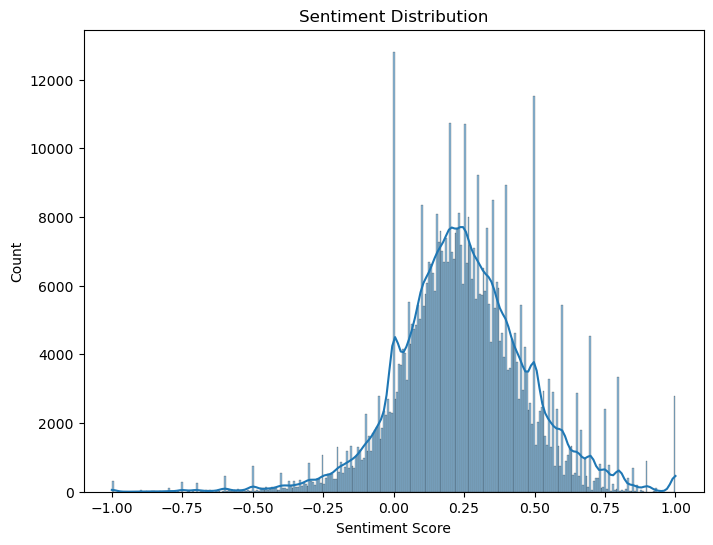

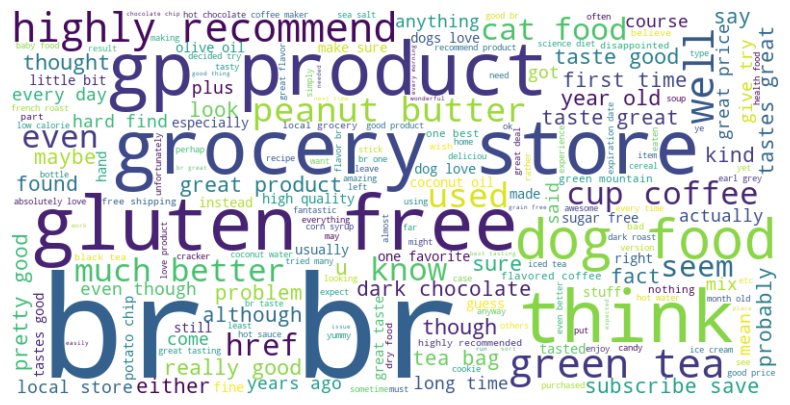

In [16]:
# Sentiment Distribution
plt.figure(figsize=(8,6))
sns.histplot(data['sentiment'], kde=True)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Score")
plt.show()

# Word Cloud for Keywords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['cleaned_text']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



#### We use Streamlit to build an interactive app where users can input a review.
#### The app returns the sentiment score and extracts relevant keywords or topics from the review.


In [18]:
# Streamlit code for creating an interactive app
import streamlit as st

# Title and instructions
st.title("Amazon Customer Review Analysis App")
st.write("Enter a review to see sentiment and keywords:")

# Input text
user_input = st.text_input("Enter your review:")

if user_input:
    cleaned_input = preprocess_text(user_input)
    sentiment = get_sentiment(cleaned_input)
    st.write("Sentiment Score:", sentiment)
    
    # Display top keywords for the review
    st.write("Key Topics/Keywords:", ", ".join([word for word in cleaned_input.split()[:5]]))


2024-11-01 14:15:18.185 
  command:

    streamlit run C:\Users\rajka\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
